# 🚀 FORECAST - Запуск с данными из Google Drive

**Команда Pulsetech**

Этот ноутбук загружает большой датасет с Google Drive и запускает полное обучение.

⏱️ **Время выполнения**: зависит от размера данных

⚙️ **Runtime**: Используйте **CPU** (GPU не нужен!)

---

## 📝 Структура данных:

Ожидается файл `forecast_data.zip` на Google Drive со структурой:
```
forecast_data/
  ├── candles.csv      → train_candles.csv
  ├── news.csv         → train_news.csv
  ├── candles_2.csv    → test_candles.csv (public+private)
  └── news_2.csv       → test_news.csv
```

---


## 0. Настройка Runtime (ВАЖНО!)

**Выберите CPU runtime:**
1. В меню сверху: `Runtime` → `Change runtime type`
2. В поле `Hardware accelerator` выберите **None** (это CPU)
3. Нажмите `Save`

⚠️ **GPU не нужен для этой задачи!**


## 1. Подключение Google Drive


In [10]:
from google.colab import drive
import os

# Монтируем Google Drive
drive.mount('/content/drive')

print("✅ Google Drive подключен!")
print("\n📂 Путь к вашим файлам: /content/drive/MyDrive/")
print("\n⚠️ Убедитесь что файл forecast_data.zip находится в корне MyDrive")
print("   или укажите правильный путь на следующем шаге")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive подключен!

📂 Путь к вашим файлам: /content/drive/MyDrive/

⚠️ Убедитесь что файл forecast_data.zip находится в корне MyDrive
   или укажите правильный путь на следующем шаге


## 2. Клонирование репозитория


In [11]:
# Клонируем репозиторий
!git clone https://github.com/sokanaid/finnam-forecast-pulsetech.git
%cd finnam-forecast-pulsetech

print("✅ Репозиторий склонирован!")
print("\n📦 Устанавливаем зависимости...")

# Устанавливаем зависимости
!pip install -q -r requirements.txt

print("✅ Зависимости установлены!")


Cloning into 'finnam-forecast-pulsetech'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 85 (delta 34), reused 64 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 25.47 MiB | 7.57 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Updating files: 100% (28/28), done.
/content/finnam-forecast-pulsetech/finnam-forecast-pulsetech
✅ Репозиторий склонирован!

📦 Устанавливаем зависимости...
✅ Зависимости установлены!


## 3. Распаковка данных из Google Drive


In [12]:
import zipfile
import shutil

# Путь к вашему ZIP файлу на Google Drive
# ИЗМЕНИТЕ ПУТЬ если файл находится в другой папке!
zip_path = '/content/drive/MyDrive/forecast_data.zip'

# Проверяем существование файла
if not os.path.exists(zip_path):
    print(f"❌ Файл не найден: {zip_path}")
    print("\n📂 Проверьте путь к файлу!")
    print("   Возможные варианты:")
    print("   - /content/drive/MyDrive/forecast_data.zip")
    print("   - /content/drive/MyDrive/Colab Notebooks/forecast_data.zip")
    print("\n💡 Используйте команду ниже чтобы найти файл:")
    print("   !find /content/drive/MyDrive -name 'forecast_data.zip'")
else:
    print(f"✅ Файл найден: {zip_path}")
    file_size_mb = os.path.getsize(zip_path) / 1024 / 1024
    print(f"📦 Размер: {file_size_mb:.1f} MB")

    print("\n📂 Распаковываем данные...")

    # Распаковываем в текущую директорию
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('.')

    print("✅ Данные распакованы!")

    # Показываем структуру
    print("\n📁 Структура распакованных файлов:")
    !ls -lh forecast_data/


✅ Файл найден: /content/drive/MyDrive/forecast_data.zip
📦 Размер: 25.0 MB

📂 Распаковываем данные...
✅ Данные распакованы!

📁 Структура распакованных файлов:
total 98M
-rw-r--r-- 1 root root  87K Oct  4 20:08 candles_2.csv
-rw-r--r-- 1 root root 1.2M Oct  4 20:08 candles.csv
-rw-r--r-- 1 root root 8.4M Oct  4 20:08 news_2.csv
-rw-r--r-- 1 root root  88M Oct  4 20:08 news.csv


## 4. Подготовка данных

Переименовываем файлы под структуру, которую ожидает наш код


In [13]:
import pandas as pd

# Создаем структуру папок
!mkdir -p data/raw

# Копируем и переименовываем файлы
file_mapping = {
    'forecast_data/candles.csv': 'data/raw/train_candles.csv',
    'forecast_data/news.csv': 'data/raw/train_news.csv',
    'forecast_data/candles_2.csv': 'data/raw/public_test_candles.csv',
    'forecast_data/news_2.csv': 'data/raw/test_news.csv',
}

print("📋 Переименовываем и копируем файлы:\n")

for source, target in file_mapping.items():
    if os.path.exists(source):
        shutil.copy(source, target)
        size_mb = os.path.getsize(target) / 1024 / 1024

        # Показываем размер и первые строки
        df = pd.read_csv(target, nrows=2)
        print(f"✅ {source}")
        print(f"   → {target}")
        print(f"   Размер: {size_mb:.1f} MB, Колонки: {list(df.columns)}")
        print()
    else:
        print(f"⚠️ Файл не найден: {source}")
        print()

# Для private_test создаем копию public (если нет отдельного файла)
if not os.path.exists('data/raw/private_test_candles.csv'):
    shutil.copy('data/raw/public_test_candles.csv', 'data/raw/private_test_candles.csv')
    print("📝 Создана копия public_test → private_test")

print("\n✅ Данные готовы!")


📋 Переименовываем и копируем файлы:

✅ forecast_data/candles.csv
   → data/raw/train_candles.csv
   Размер: 1.2 MB, Колонки: ['open', 'close', 'high', 'low', 'volume', 'begin', 'ticker']

✅ forecast_data/news.csv
   → data/raw/train_news.csv
   Размер: 87.9 MB, Колонки: ['Unnamed: 0', 'publish_date', 'title', 'publication']

✅ forecast_data/candles_2.csv
   → data/raw/public_test_candles.csv
   Размер: 0.1 MB, Колонки: ['open', 'close', 'high', 'low', 'volume', 'begin', 'ticker']

✅ forecast_data/news_2.csv
   → data/raw/test_news.csv
   Размер: 8.3 MB, Колонки: ['publish_date', 'title', 'publication']


✅ Данные готовы!


## 5. 🚀 Обучение модели

Это может занять от нескольких минут до часа в зависимости от размера данных


In [14]:
import time

start_time = time.time()

print("="*70)
print("🎓 НАЧАЛО ОБУЧЕНИЯ")
print("="*70)

!python train.py

elapsed = time.time() - start_time
print(f"\n⏱️ Время обучения: {elapsed/60:.2f} минут")

# Проверяем что модели созданы
if os.path.exists('models/forecast_models.pkl'):
    size_mb = os.path.getsize('models/forecast_models.pkl') / 1024 / 1024
    print(f"✅ Модели сохранены: models/forecast_models.pkl ({size_mb:.1f} MB)")
else:
    print("❌ Ошибка: модели не созданы!")


🎓 НАЧАЛО ОБУЧЕНИЯ
🚀 ОБУЧЕНИЕ МОДЕЛИ FORECAST

📁 Входные данные:
   Train candles: /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/data/raw/train_candles.csv
   Train news: /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/data/raw/train_news.csv
   Output dir: /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/models

ЭТАП 1: Загрузка данных
📊 Загрузка данных (режим: train)...
   ✓ Train candles: 24197 строк, 19 тикеров
   ✓ Train news: 25425 новостей
   ✓ Test candles: 2144 строк (public: 1745, private: 399)
   ✓ Test news: 2030 новостей
🔍 Извлечение тикеров из новостей...
   ✓ Найдено тикеров в 24324/27455 новостях
   ✓ Total candles: 26341 строк
   ✓ Total news: 27455 новостей

📊 Статистика данных:
   Тикеров: 19
   Дат: 1274
   Период: 2020-06-19 00:00:00 - 2025-06-18 00:00:00

ЭТАП 2: Подготовка таргетов

🎯 Подготовка таргетов для всех горизонтов...
   ✓ Создано 20 пар таргетов (return + direction)
   Строк для обучения: 24898

ЭТАП 3: Feature Eng

## 6. 🔮 Создание предсказаний


In [15]:
print("="*70)
print("🔮 СОЗДАНИЕ ПРЕДСКАЗАНИЙ")
print("="*70)

!python predict.py

if os.path.exists('submission.csv'):
    print("\n✅ submission.csv создан!")
else:
    print("\n❌ Ошибка: submission.csv не создан!")


🔮 СОЗДАНИЕ ПРЕДСКАЗАНИЙ
🔮 СОЗДАНИЕ ПРЕДСКАЗАНИЙ FORECAST

📁 Входные данные:
   Public test: /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/data/raw/public_test_candles.csv
   Private test: /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/data/raw/private_test_candles.csv
   Test news: /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/data/raw/test_news.csv
   Models dir: /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/models
   Output: /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/submission.csv

ЭТАП 1: Загрузка модели

📂 Загрузка моделей из /content/finnam-forecast-pulsetech/finnam-forecast-pulsetech/models/forecast_models.pkl...
   ✓ Загружено 20 моделей
   ✓ Количество признаков: 31

📂 Загрузка обработанных данных...
   ✓ Данных загружено: 26341 строк
   ✓ Признаков: 31

ЭТАП 2: Загрузка тестовых данных
📊 Загрузка данных (режим: test)...
   ✓ Train candles: 24197 строк, 19 тикеров
   ✓ Train news: 25425 новостей
   ✓ 

## 7. 📊 Анализ результатов и метрик


In [16]:
import numpy as np
import matplotlib.pyplot as plt

submission = pd.read_csv('submission.csv')
prob_cols = [f'p{i}' for i in range(1, 21)]

print('=' * 70)
print('📊 ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ')
print('=' * 70)

print(f'\n✅ Размер: {len(submission)} строк')
print(f'✅ Уникальных тикеров: {submission["ticker"].nunique()}')
print(f'✅ Тикеры: {list(submission["ticker"].unique())}')

# Общая статистика
all_probs = submission[prob_cols].values.flatten()
print(f'\n📈 Общая статистика вероятностей:')
print(f'   Среднее: {all_probs.mean():.4f}')
print(f'   Std: {all_probs.std():.4f}')
print(f'   Min: {all_probs.min():.4f}')
print(f'   Max: {all_probs.max():.4f}')
print(f'   Медиана: {np.median(all_probs):.4f}')

# Распределение
print(f'\n📊 Распределение вероятностей:')
ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
for low, high in ranges:
    count = ((all_probs >= low) & (all_probs < high)).sum()
    pct = count / len(all_probs) * 100
    print(f'   [{low:.1f}-{high:.1f}): {pct:5.1f}% ({count:,} значений)')

# Тренд по горизонтам
print(f'\n📉 Средние вероятности по горизонтам:')
horizon_means = []
for i in range(1, 21):
    mean_val = submission[f'p{i}'].mean()
    horizon_means.append(mean_val)
    print(f'   Горизонт {i:2d}: {mean_val:.4f}')

# Тренд
trend_diff = horizon_means[0] - horizon_means[-1]
if trend_diff > 0:
    print(f'\n📉 Тренд: УБЫВАЮЩИЙ (Δ={trend_diff:.4f})')
    print('   ✅ Логично: уверенность снижается с горизонтом')
else:
    print(f'\n📈 Тренд: НЕ убывающий (Δ={trend_diff:.4f})')

print('\n' + '=' * 70)


📊 ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ

✅ Размер: 19 строк
✅ Уникальных тикеров: 19
✅ Тикеры: ['AFLT', 'ALRS', 'CHMF', 'GAZP', 'GMKN', 'LKOH', 'MAGN', 'MGNT', 'MOEX', 'MTSS', 'NVTK', 'PHOR', 'PLZL', 'ROSN', 'RUAL', 'SBER', 'SIBN', 'T', 'VTBR']

📈 Общая статистика вероятностей:
   Среднее: 0.5656
   Std: 0.1120
   Min: 0.2120
   Max: 0.8773
   Медиана: 0.5652

📊 Распределение вероятностей:
   [0.0-0.2):   0.0% (0 значений)
   [0.2-0.4):   5.5% (21 значений)
   [0.4-0.6):  55.8% (212 значений)
   [0.6-0.8):  37.1% (141 значений)
   [0.8-1.0):   1.6% (6 значений)

📉 Средние вероятности по горизонтам:
   Горизонт  1: 0.4898
   Горизонт  2: 0.5261
   Горизонт  3: 0.5600
   Горизонт  4: 0.6248
   Горизонт  5: 0.6945
   Горизонт  6: 0.6373
   Горизонт  7: 0.5761
   Горизонт  8: 0.5540
   Горизонт  9: 0.5249
   Горизонт 10: 0.5691
   Горизонт 11: 0.5489
   Горизонт 12: 0.5081
   Горизонт 13: 0.5456
   Горизонт 14: 0.5412
   Горизонт 15: 0.5207
   Горизонт 16: 0.6729
   Горизонт 17: 0.5864
   Горизонт 

## 8. 📈 Визуализация


/tmp/ipython-input-2449182953.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(boxplot_data, labels=['1д', '5д', '10д', '15д', '20д'])


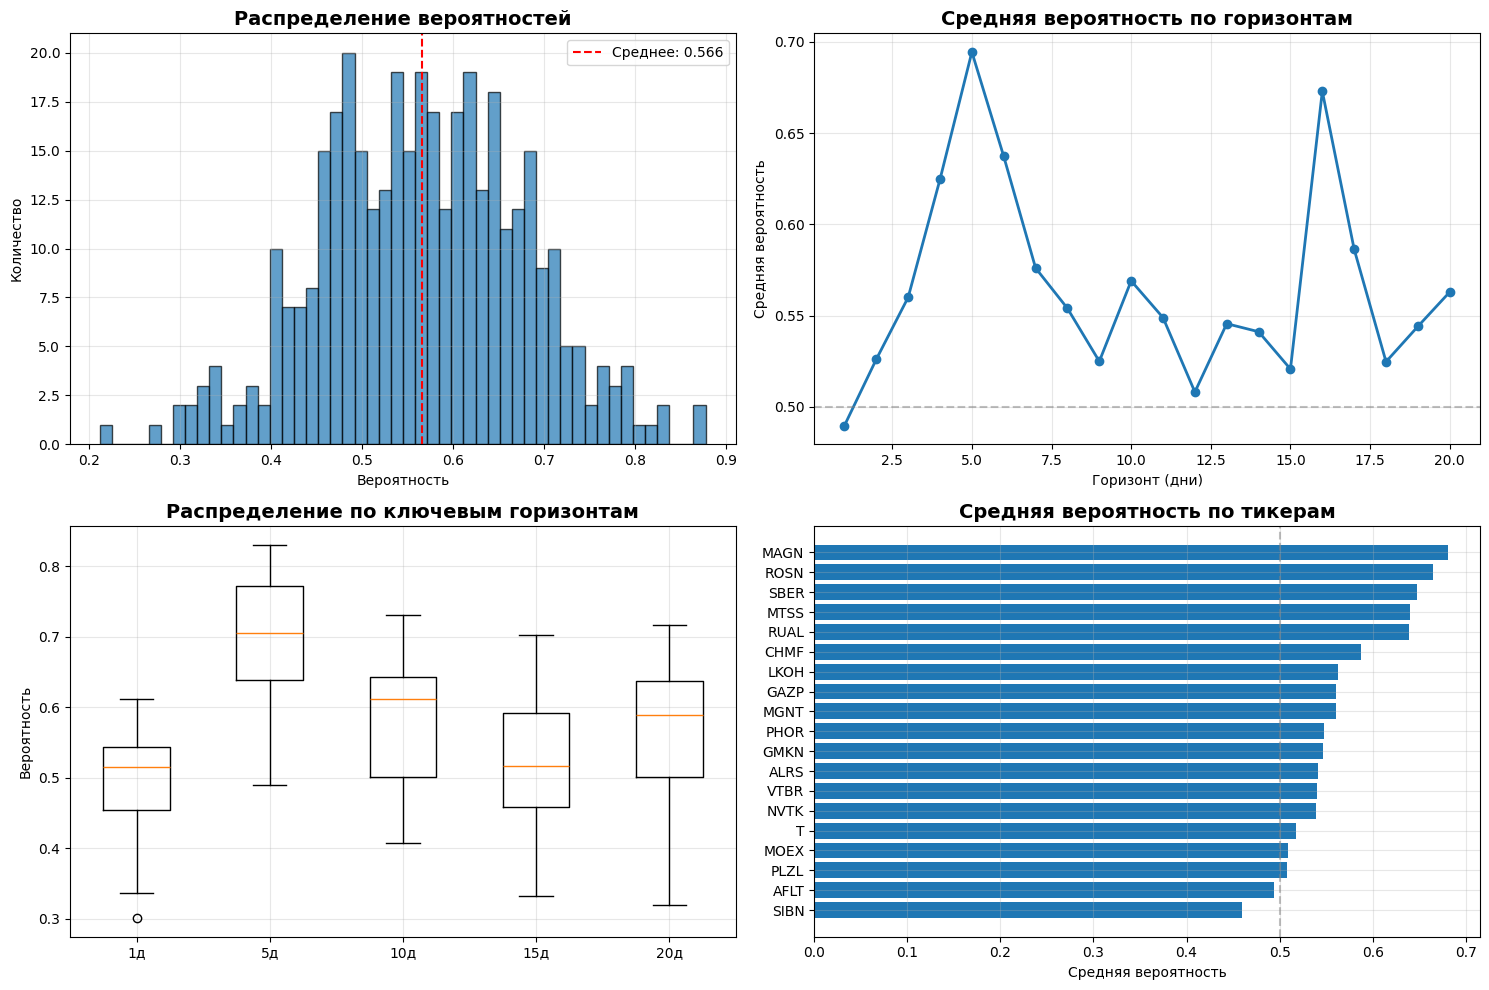

✅ Визуализация готова!


In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Гистограмма распределения вероятностей
axes[0, 0].hist(all_probs, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение вероятностей', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Вероятность')
axes[0, 0].set_ylabel('Количество')
axes[0, 0].axvline(all_probs.mean(), color='red', linestyle='--', label=f'Среднее: {all_probs.mean():.3f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Тренд по горизонтам
axes[0, 1].plot(range(1, 21), horizon_means, marker='o', linewidth=2)
axes[0, 1].set_title('Средняя вероятность по горизонтам', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Горизонт (дни)')
axes[0, 1].set_ylabel('Средняя вероятность')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].axhline(0.5, color='gray', linestyle='--', alpha=0.5)

# 3. Boxplot по горизонтам (каждые 4 горизонта)
boxplot_data = [submission[f'p{i}'].values for i in [1, 5, 10, 15, 20]]
axes[1, 0].boxplot(boxplot_data, labels=['1д', '5д', '10д', '15д', '20д'])
axes[1, 0].set_title('Распределение по ключевым горизонтам', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Вероятность')
axes[1, 0].grid(alpha=0.3)

# 4. Средние вероятности по тикерам
ticker_means = submission.groupby('ticker')[prob_cols].mean().mean(axis=1).sort_values()
axes[1, 1].barh(ticker_means.index, ticker_means.values)
axes[1, 1].set_title('Средняя вероятность по тикерам', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Средняя вероятность')
axes[1, 1].axvline(0.5, color='gray', linestyle='--', alpha=0.5)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Визуализация готова!")


## 9. 📥 Скачивание результатов


In [18]:
from google.colab import files

# Скачиваем submission
if os.path.exists('submission.csv'):
    files.download('submission.csv')
    print("✅ submission.csv скачан!")
else:
    print("❌ Файл не найден!")

# Опционально: сохранить в Google Drive
save_to_drive = input("\n💾 Сохранить submission.csv в Google Drive? (y/n): ")
if save_to_drive.lower() == 'y':
    output_path = '/content/drive/MyDrive/submission_forecast.csv'
    shutil.copy('submission.csv', output_path)
    print(f"✅ Сохранено в: {output_path}")

print("\n🎉 Готово! Теперь можете отправить submission.csv на лидерборд")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ submission.csv скачан!


KeyboardInterrupt: Interrupted by user

---

## ✅ Готово!

**Результаты:**
- ✅ Модель обучена на ваших данных
- ✅ Предсказания созданы
- ✅ Метрики проанализированы
- ✅ Визуализация построена
- ✅ submission.csv готов для отправки

**Следующие шаги:**
1. Отправьте `submission.csv` на лидерборд
2. Обновите метрики в презентации реальными значениями
3. Сравните с предыдущими результатами

---

**Команда Pulsetech** 🚀
